# 🧠 Build The Self-Attention in PyTorch From Scratch

This notebook explores the internal mechanics of self-attention in transformer models, with a focus on building the self-attention layer from scratch using PyTorch. Based on Damien Benveniste's slide series "Build The Self-Attention in PyTorch From Scratch", we examine how transformer decoders operate, how tokens are embedded and projected into query, key, and value vectors, and how multi-head attention layers combine contextual information from sequences. 

[📄 View the Slides (PDF)](./Build%20The%20Self-Attention%20in%20PyTorch%20From%20Scratch.pdf)

In [ ]:
from pdf2image import convert_from_path

pdf_path = 'Build The Self-Attention in PyTorch From Scratch.pdf'

def load_pdf_pages(pdf_path, page_numbers, dpi=600):
    return [
        convert_from_path(pdf_path, dpi=dpi, first_page=p, last_page=p)[0]
        for p in page_numbers
    ]

In [41]:
self_attn_page_num = [6, 8, 10, 11, 14, 21, 31, 34, 35, 36]
self_attn_pages = load_pdf_pages(pdf_path, self_attn_page_num)

In [42]:
import matplotlib.pyplot as plt

def show_pdf_page(image):
    plt.figure(figsize=(12, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

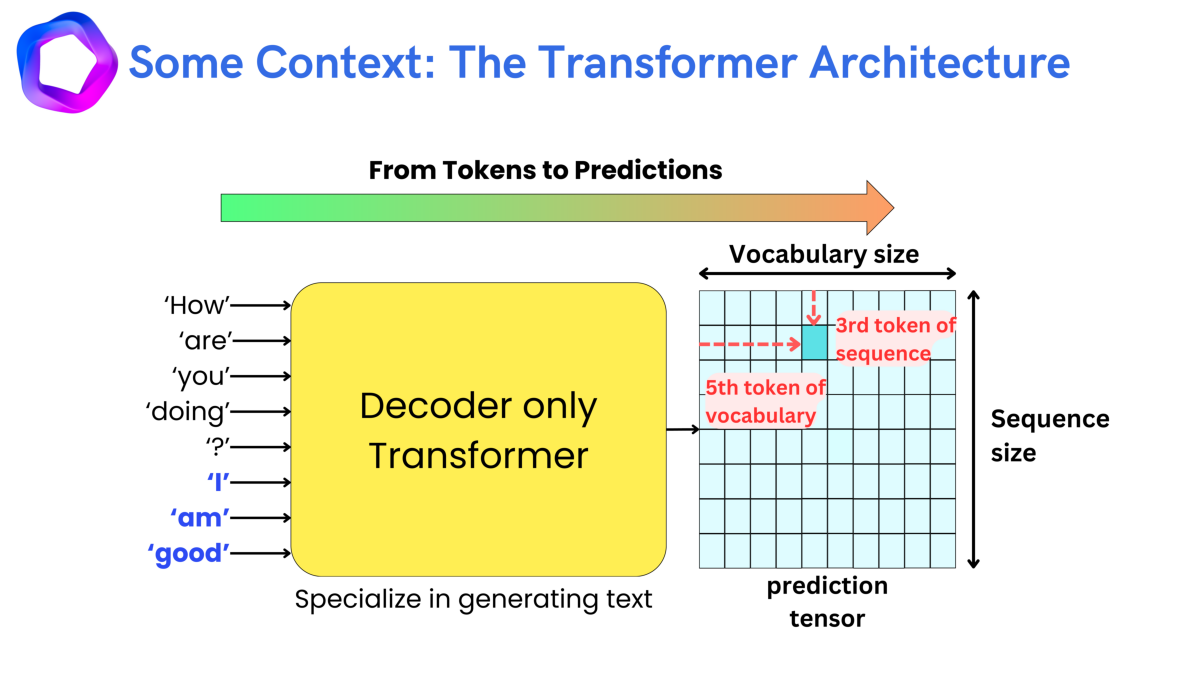

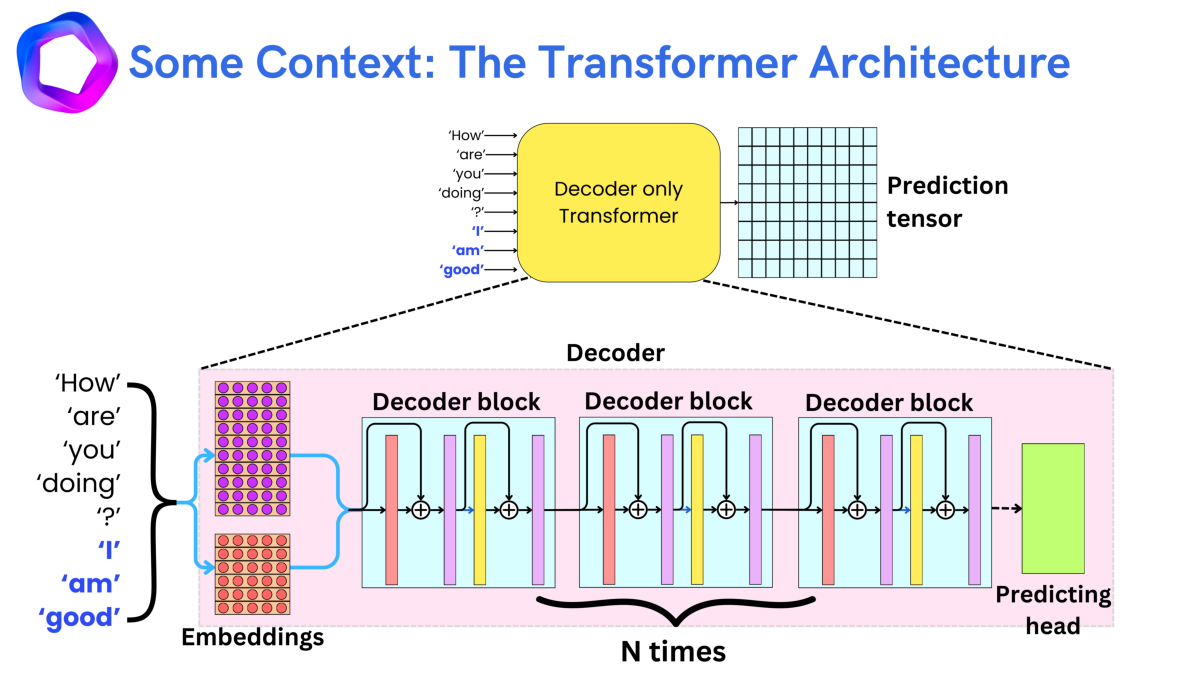

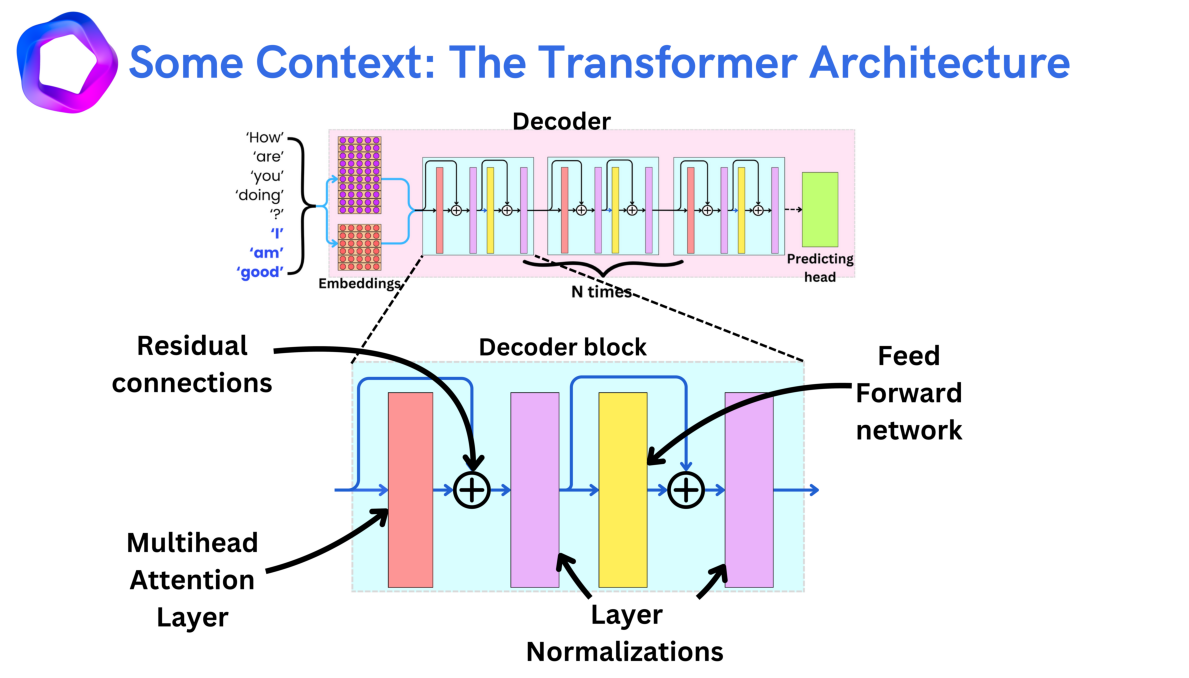

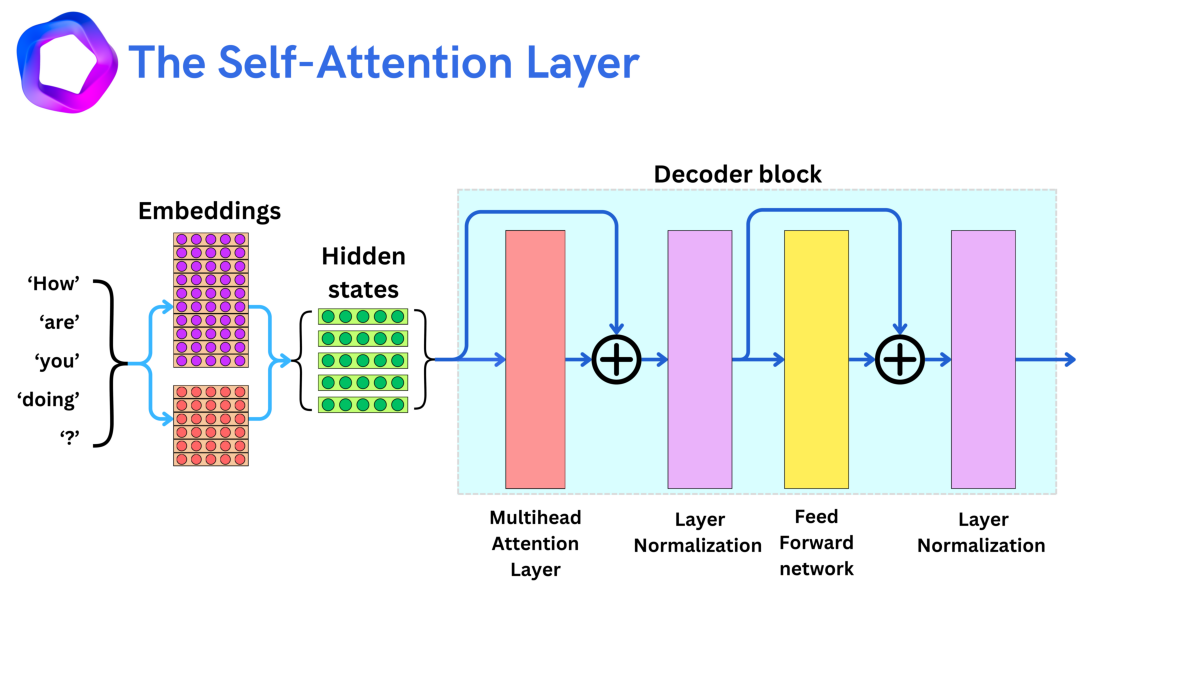

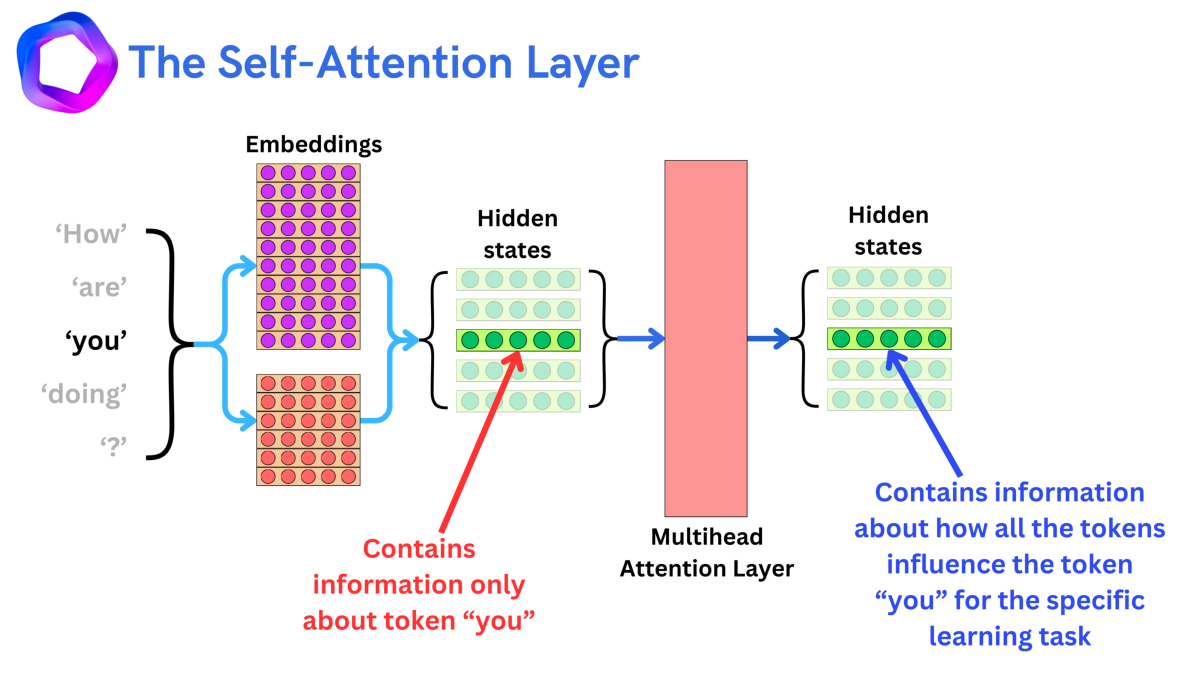

In [43]:
for page in self_attn_pages[:5]:
    show_pdf_page(page)

In [ ]:
# !pip install torch
import torch 

In [ ]:
sample = "How are you doing ? I am good and you"
token_set = set(sample.lower().split())

index2token = {
    0: '<S0S>', # Start of Sequence
    1: '<E0S>', # End of Sequence
    2: '<PAD>'
}

for token in token_set:
    index2token[len(index2token)] = token

index2token

{0: '<S0S>',
 1: '<E0S>',
 2: '<PAD>',
 3: 'doing',
 4: '?',
 5: 'and',
 6: 'how',
 7: 'am',
 8: 'i',
 9: 'are',
 10: 'good',
 11: 'you'}

In [ ]:
token2index = {v: k for k, v in index2token.items()}
token2index

{'<S0S>': 0,
 '<E0S>': 1,
 '<PAD>': 2,
 'doing': 3,
 '?': 4,
 'and': 5,
 'how': 6,
 'am': 7,
 'i': 8,
 'are': 9,
 'good': 10,
 'you': 11}

In [ ]:
def convert2tensor(sentence):
    tokens = sentence.lower().split()
    indices = [token2index[token] for token in tokens]
    print(indices)
    return torch.tensor(indices, dtype=torch.long).view((1, -1))

convert2tensor("How are you doing ?")

[6, 9, 11, 3, 4]


tensor([[ 6,  9, 11,  3,  4]])

In [ ]:
import torch.nn as nn

VOCAB_SIZE = len(token2index)
D_MODEL = 24 # Internal dimensions of transformer model

embedding = nn.Embedding(VOCAB_SIZE, D_MODEL)

input_tensor = convert2tensor("How are you doing ?")
hidden_states = embedding(input_tensor)
hidden_states.size() # (batch size x seq length x d_model)

[6, 9, 11, 3, 4]


torch.Size([1, 5, 24])

In [ ]:
VOCAB_SIZE

12

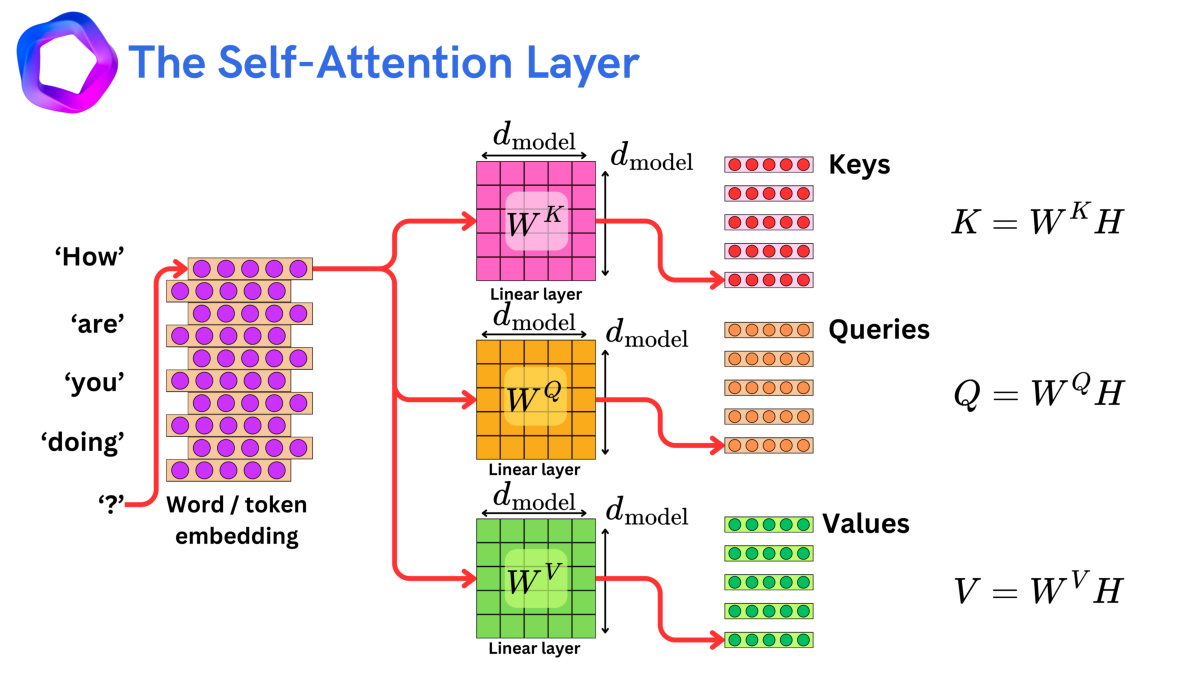

In [ ]:
show_pdf_page(self_attn_pages[5])

In [ ]:
Wk = nn.Linear(D_MODEL, D_MODEL)
Wq = nn.Linear(D_MODEL, D_MODEL)
Wv = nn.Linear(D_MODEL, D_MODEL)

queries = Wq(hidden_states)
keys = Wk(hidden_states)
values = Wv(hidden_states)

queries.size() # (batch size x seq length x d_model)

torch.Size([1, 5, 24])

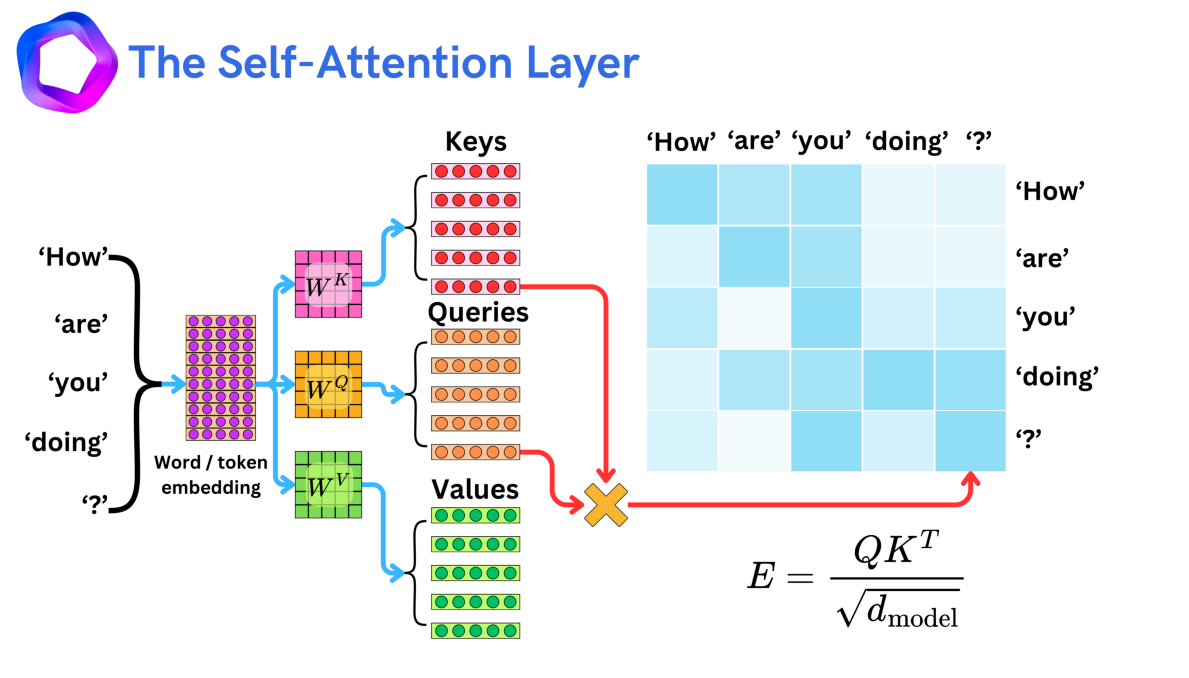

In [ ]:
show_pdf_page(self_attn_pages[6])

In [ ]:
import numpy as np

# Dot Product
# (..., seq length, d_model) x (..., seq length, d_model)
alignment = torch.matmul(queries, keys.transpose(1, 2)) / np.sqrt(D_MODEL) # transpose second and third dimension
alignment.size() # (batch size x seq length x d_model)

torch.Size([1, 5, 5])

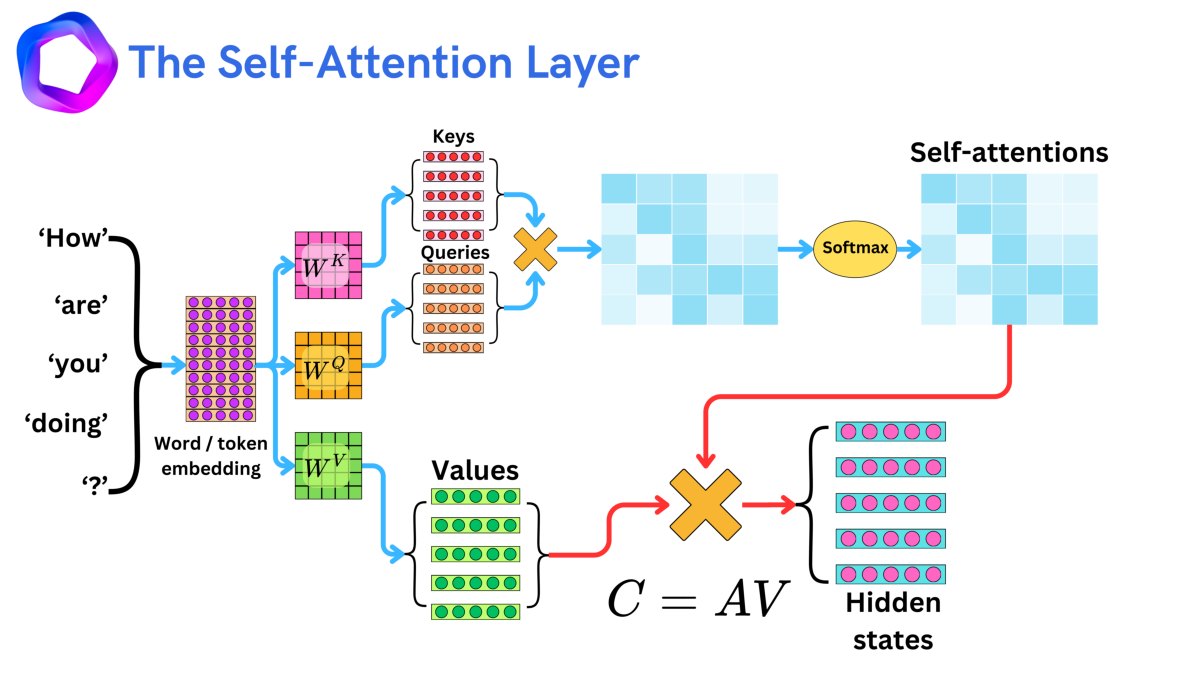

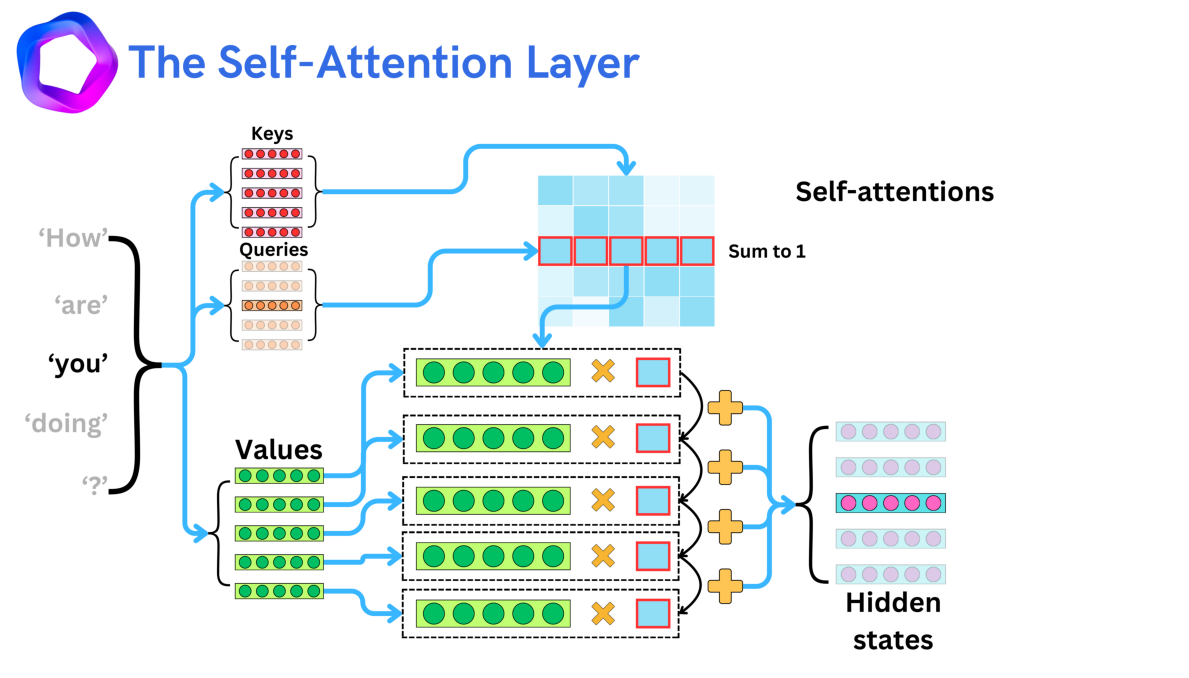

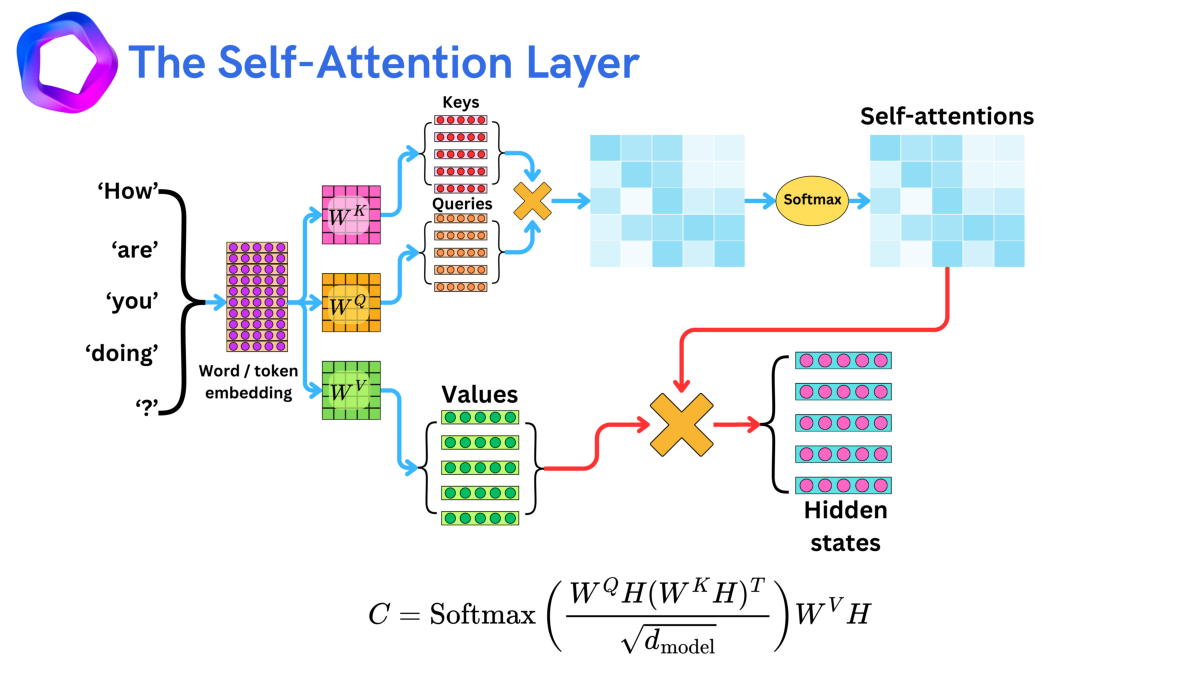

In [ ]:
for page in self_attn_pages[7:]: 
    show_pdf_page(page)

In [ ]:
self_attention = torch.softmax(alignment, dim=-1)
self_attention

tensor([[[0.2406, 0.1791, 0.1883, 0.2330, 0.1590],
         [0.2135, 0.1215, 0.2022, 0.3013, 0.1615],
         [0.2183, 0.1814, 0.2199, 0.1738, 0.2066],
         [0.2401, 0.2760, 0.1721, 0.1715, 0.1403],
         [0.2455, 0.1736, 0.1893, 0.2311, 0.1606]]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
# (..., seq length, seq length) x (..., seq length, d_model)
hidden_state_out = torch.matmul(self_attention, values) # (..., seq length, d_model)
hidden_state_out.size()

torch.Size([1, 5, 24])

In [ ]:
import torch.nn as nn

class Attention(nn.Module):

    def __init__(self, d_model) -> None:
        super().__init__()
        self.d_model = d_model
        self.Wq = nn.Linear(d_model, d_model)
        self.Wk = nn.Linear(d_model, d_model)
        self.Wv = nn.Linear(d_model, d_model)

    def forward(self, x):
        queries = self.Wq(x)
        keys = self.Wk(x)
        values = self.Wv(x)

        alignment = torch.matmul(queries, keys.transpose(1, 2)) / np.sqrt(self.d_model)
        self_attn = torch.softmax(alignment, dim=-1)
        out = torch.matmul(self_attn, values)
        return out
    
attn_layer = Attention(D_MODEL)
hidden_state_out = attn_layer(hidden_states)
hidden_state_out.size()

torch.Size([1, 5, 24])

In [ ]:
multi_attn_page_num = [39, 40, 41, 42, 44, 45, 46]
multi_attn_pages = load_pdf_pages(pdf_path, multi_attn_page_num)

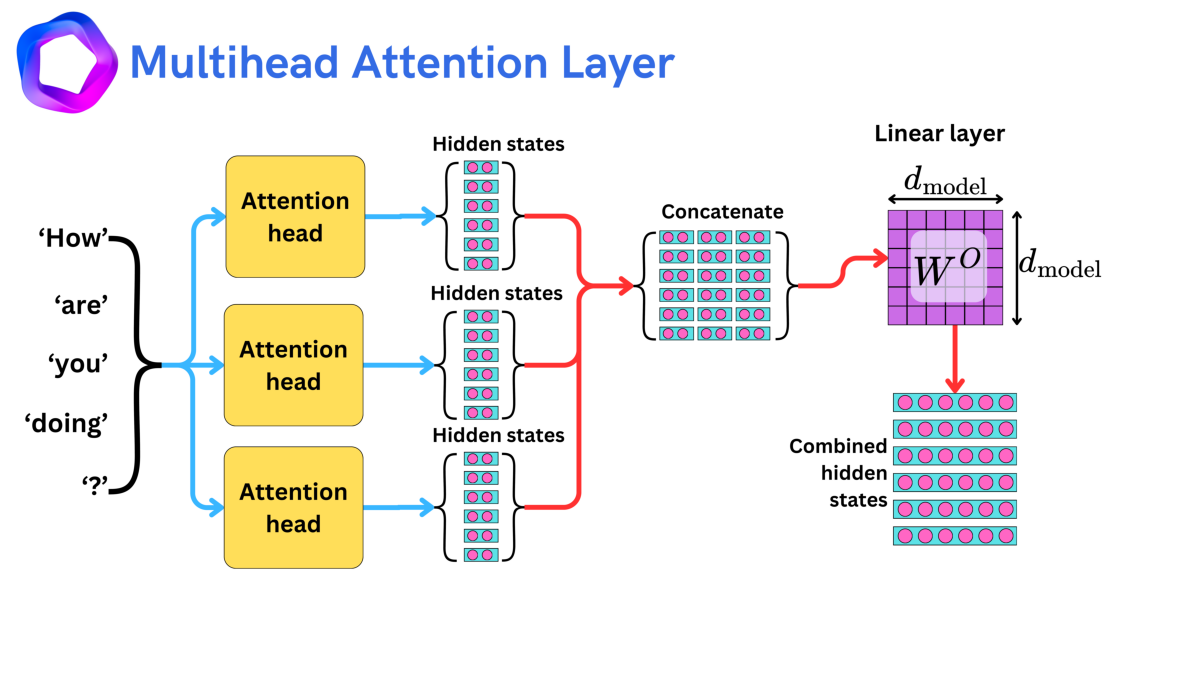

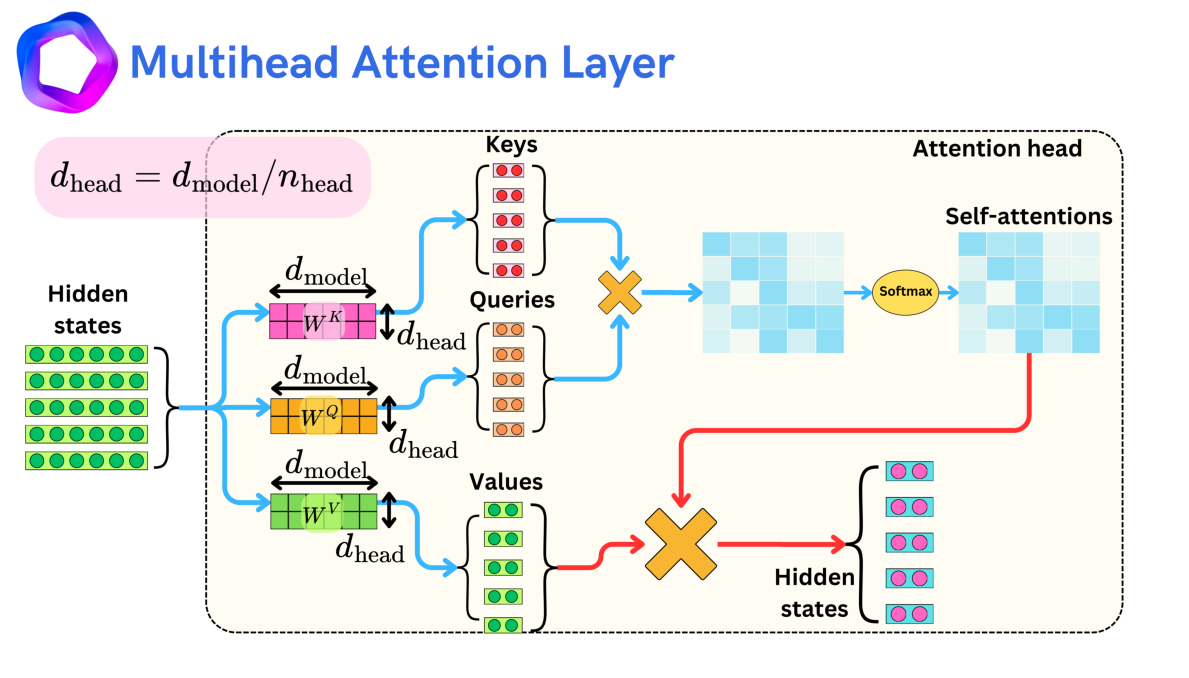

In [ ]:
for page in multi_attn_pages[:2]: 
    show_pdf_page(page)

In [ ]:
Wk = nn.Linear(D_MODEL, D_MODEL)
Wq = nn.Linear(D_MODEL, D_MODEL)
Wv = nn.Linear(D_MODEL, D_MODEL)

queries = Wq(hidden_states)
keys = Wk(hidden_states)
values = Wv(hidden_states)

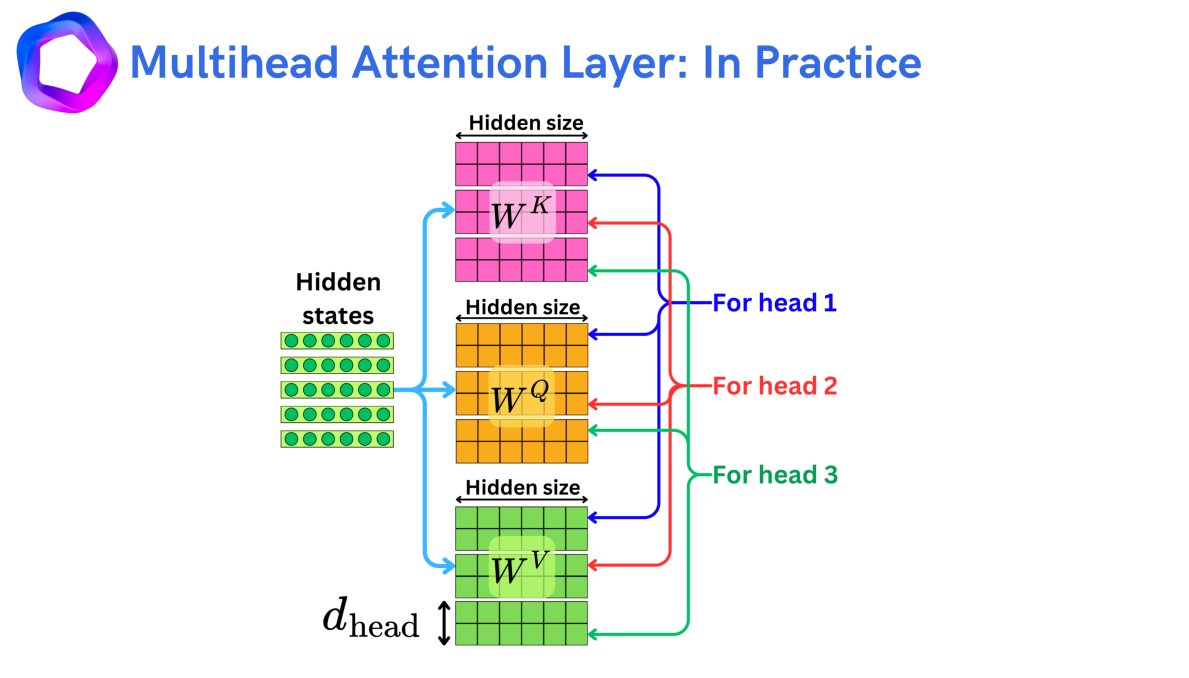

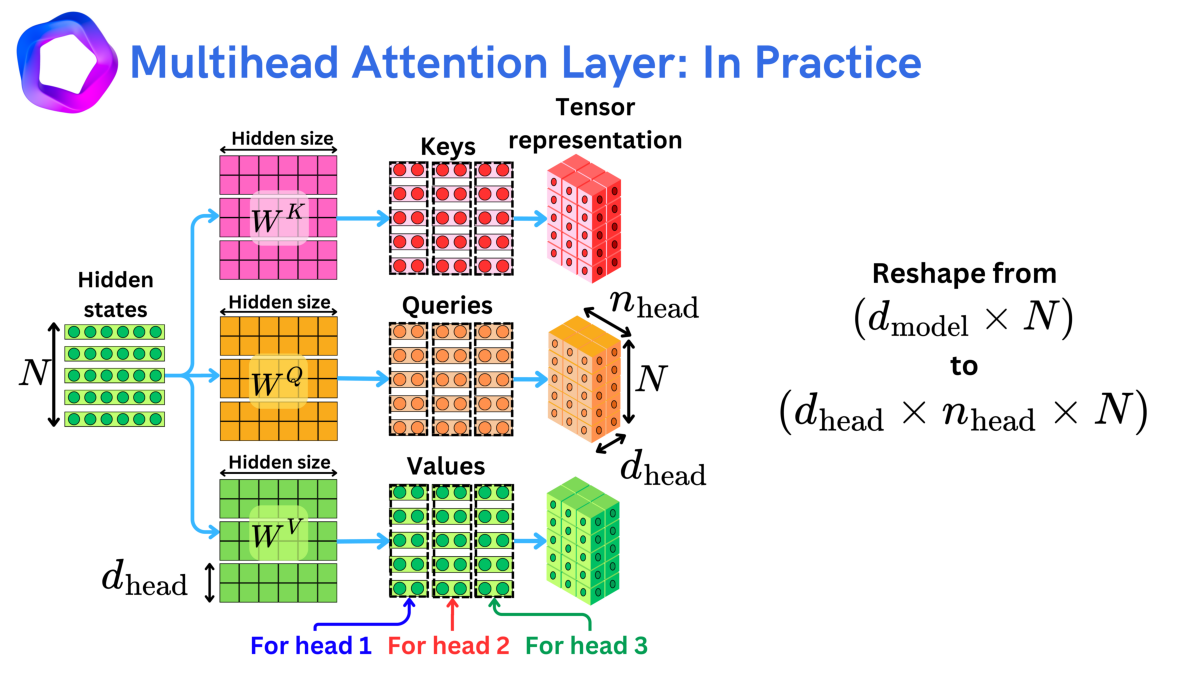

In [ ]:
for page in multi_attn_pages[2:4]: 
    show_pdf_page(page)

In [ ]:
batch_size, seq_len, d_model = hidden_states.size()

N_HEAD = 4

d_head = D_MODEL // N_HEAD

queries_reshape = queries.reshape(batch_size, seq_len, N_HEAD, d_head) # (batch size, seq len, h_head, d_head)
keys_reshape = keys.reshape(batch_size, seq_len, N_HEAD, d_head)
values_reshape = values.reshape(batch_size, seq_len, N_HEAD, d_head)

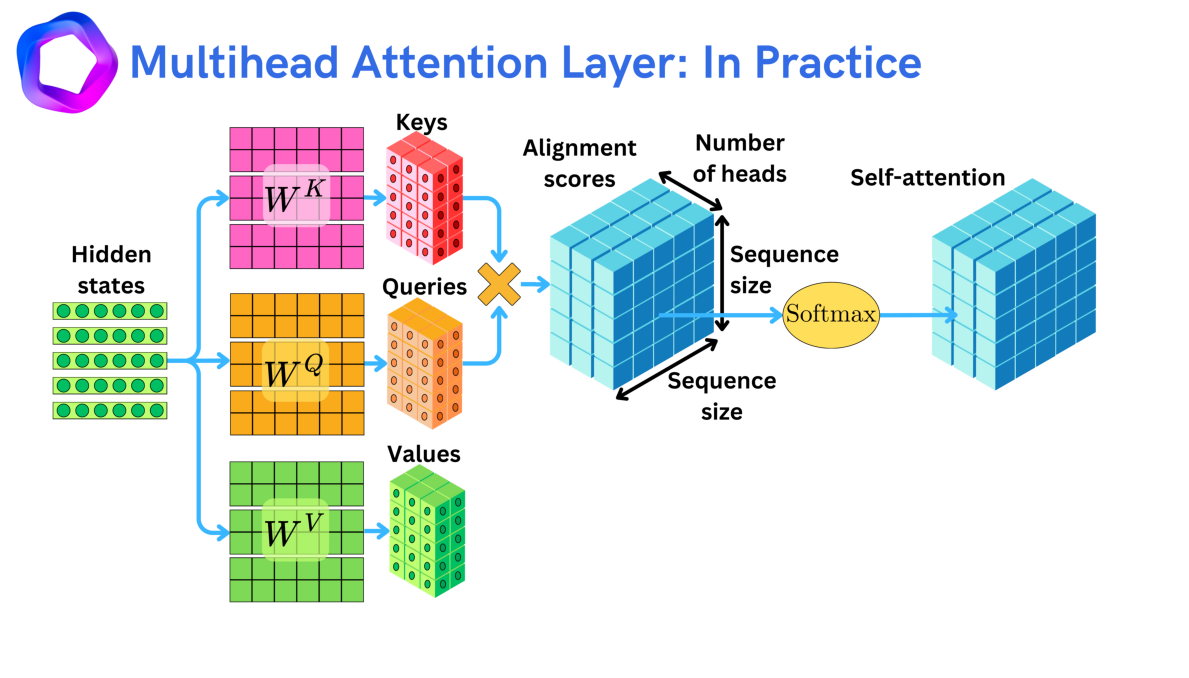

In [ ]:
show_pdf_page(multi_attn_pages[4])

In [ ]:
queries_reshape = queries_reshape.transpose(1, 2)
keys_reshape = keys_reshape.transpose(1, 2)
values_reshape = values_reshape.transpose(1, 2)

In [ ]:
# (..., seq len, d_head) x (..., seq len, d_head) 
alignment = torch.matmul(queries_reshape, keys_reshape.transpose(-2, -1))
alignment.size() # (batch size, seq len, seq len, d_head)

torch.Size([1, 4, 5, 5])

In [ ]:
self_attn = torch.softmax(alignment, dim=-1)
self_attn.sum(-1)

tensor([[[1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]]], grad_fn=<SumBackward1>)

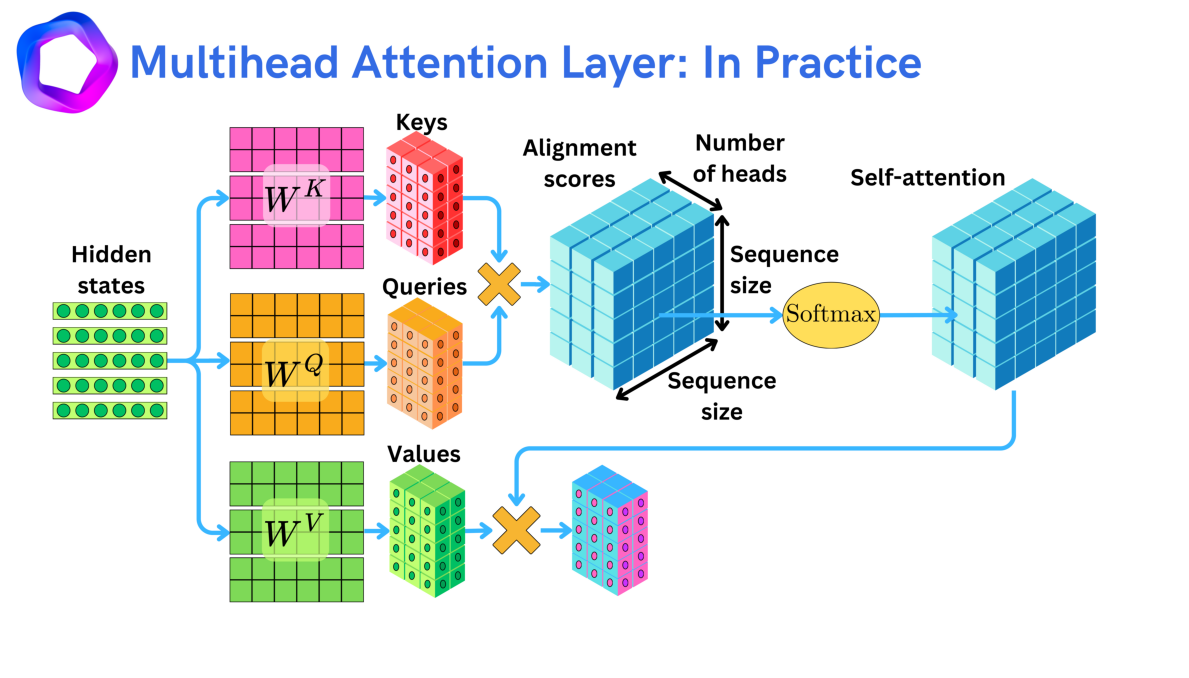

In [ ]:
show_pdf_page(multi_attn_pages[5])

In [ ]:
out = torch.matmul(self_attn, values_reshape)
out.size() # (batch size, n_head, seq len, d_head)

torch.Size([1, 4, 5, 6])

In [ ]:
out = out.transpose(1, 2)

In [ ]:
out.size()  # (batch size, seq len, n_head, d_head)

torch.Size([1, 5, 4, 6])

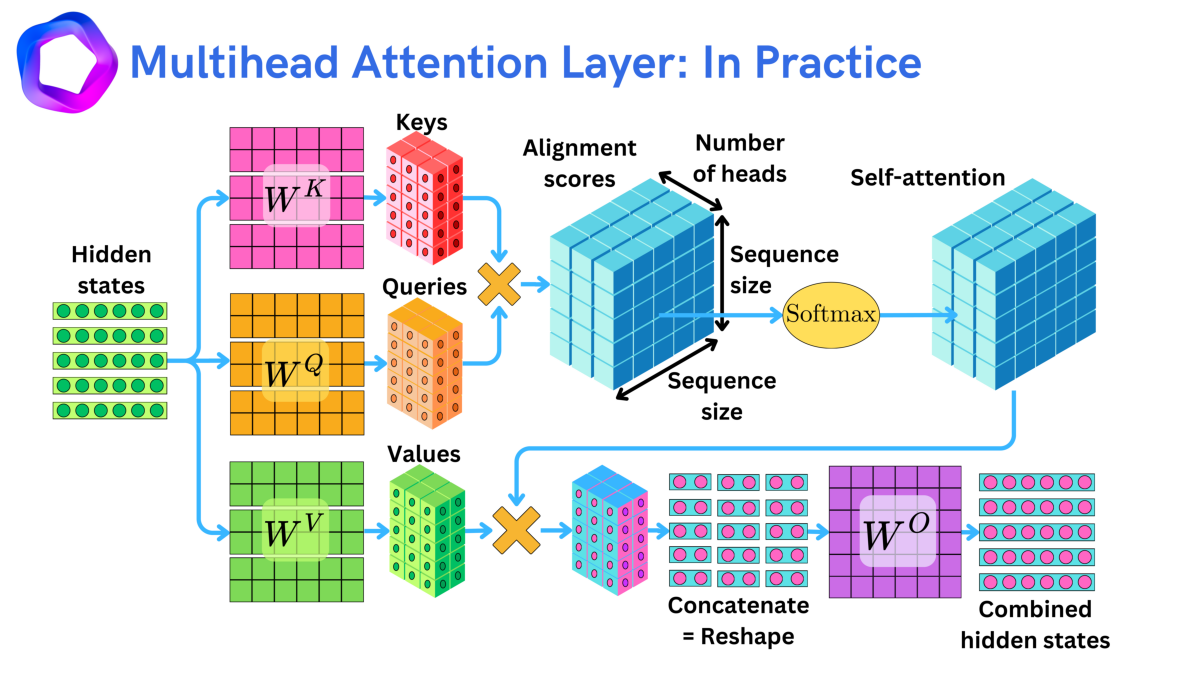

In [ ]:
show_pdf_page(multi_attn_pages[6])

In [ ]:
out_reshaped = out.reshape(batch_size, seq_len, d_model) # (batch size, seq len, n_head, d_model)
out_reshaped.size()

torch.Size([1, 5, 24])

In [ ]:
Wo = nn.Linear(D_MODEL, D_MODEL)

hidden_states_out = Wo(out_reshaped)
hidden_states_out.size()

torch.Size([1, 5, 24])

In [ ]:
class MultiheadAttention(nn.Module):
    def __init__(self, d_model, n_head):
        super().__init__()

        if d_model % n_head != 0:
            raise Exception("You need to make sure that: d_head = d_model // n_head")
        
        self.d_head = d_model // n_head
        self.n_head = n_head

        self.Wq = nn.Linear(d_model, d_model)
        self.Wk = nn.Linear(d_model, d_model)
        self.Wv = nn.Linear(d_model, d_model)
        self.Wo = nn.Linear(d_model, d_model)

    def forward(self, x):

        batch_size, seq_len, d_model = x.size()

        queries = self.Wq(x)
        keys = self.Wk(x)
        values = self.Wv(x)

        queries = queries.reshape(batch_size, seq_len, self.n_head, self.d_head)
        keys = keys.reshape(batch_size, seq_len, self.n_head, self.d_head)
        values = values.reshape(batch_size, seq_len, self.n_head, self.d_head)

        queries = queries.transpose(1, 2)
        keys =  keys.transpose(1, 2)
        values =  values.transpose(1, 2)

        alignment = torch.matmul(queries, keys.transpose(-2, -1)) / np.sqrt(self.d_head)
        self_attn = torch.softmax(alignment, dim=-1)
        out = torch.matmul(self_attn, values)
        out = out.transpose(1, 2)
        out = out.reshape(batch_size, seq_len, d_model)
        hidden_states = self.Wo(out)
        return hidden_states
    
self_attn_layer = MultiheadAttention(D_MODEL, N_HEAD)
hidden_states_out = self_attn_layer(hidden_states)

hidden_states_out.size()

torch.Size([1, 5, 24])